In [2]:
from utils import *

# DECISION TREE

In [13]:
df, train, test, val = get_data(normalize=False, binary_label=True)

In [20]:
from collections import Counter


class DecisionTreeClassifier:

    def __init__(self, max_depth=float('inf')):
        self.max_depth = max_depth
        self.root = None

    def fit(self, x, y):
        assert len(x) == len(y)
        assert len(x) != 0
        self.root = self._create_tree(x, y, None, self.max_depth)

    def _create_tree(self, data, labels, parent, max_depth):
        new_node = Node(None, None, parent)
        if not len(data):
            new_node.label = parent.label  # Use parent label
            return new_node
        most_common_result = Counter(labels).most_common(1)[0][0]
        if len(labels) == 1 or data.shape[1] == 0:  # No more features to split
            new_node.label = most_common_result
            return new_node
        if len(np.unique(labels)) == 1:  # All labels are the same
            new_node.label = labels[0]
            return new_node

        best_feature, best_threshold = self._find_best_split(data, labels)
        new_node = Node(best_feature, best_threshold, parent)

        if max_depth > 0:
            index = data[:, best_feature] <= best_threshold
            data_left = data[index]
            labels_left = labels[index]
            if len(data_left) == 0:
                new_node.label = most_common_result
            new_node.left_child = self._create_tree(data_left, labels_left, new_node, max_depth - 1)

            index = data[:, best_feature] > best_threshold
            data_right = data[index]
            labels_right = labels[index]
            if len(data_right) == 0:
                new_node.label = most_common_result
            new_node.right_child = self._create_tree(data_right, labels_right, new_node, max_depth - 1)

        else:
            new_node.label = most_common_result
            new_node.left_child = None
            new_node.right_child = None

        return new_node

    def _find_best_split(self, data, labels):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for feature in range(data.shape[1]):
            threshold = np.median(data[:, feature])
            gain = self._information_gain(data, labels, feature, threshold)
            if gain >= best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, data, labels, feature, threshold):
        entropy_labels = self._entropy(labels)
        sample_left = labels[data[:, feature] <= threshold]
        sample_right = labels[data[:, feature] > threshold]

        information_gain = entropy_labels - (
                len(sample_left) / len(data) * self._entropy(sample_left) +
                len(sample_right) / len(data) * self._entropy(sample_right)
        )

        return information_gain

    def _entropy(self, labels):
        if len(labels) == 0:
            return 0
        p = sum(labels) / len(labels)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    def predict(self, data):
        predictions = []
        for row in data:
            node = self.root
            while node.label is None:
                if row[node.feature] <= node.threshold:
                    node = node.left_child
                else:
                    node = node.right_child
            predictions.append(node.label)

        return predictions


class Node:
    def __init__(self, feature, threshold, parent):
        self.feature = feature
        self.threshold = threshold
        self.parent = parent
        self.label = None
        self.left_child = None
        self.right_child = None


### Sklearn

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
test_model(clf, train, test, classification=True)

Time taken to train the model:  1.3408911228179932
Binary cross entropy: 15.046600166222445
Accuracy: 0.5825450876529197


0.5825450876529197

Trying hyperparameters: 1
Time taken to train the model:  0.08764791488647461
Binary cross entropy: 14.831142258489006
Accuracy: 0.5885227810184456
Value: 0.5885227810184456
Trying hyperparameters: 2
Time taken to train the model:  0.16405081748962402
Binary cross entropy: 13.512818502178872
Accuracy: 0.6250985338168059
Value: 0.6250985338168059
Trying hyperparameters: 3
Time taken to train the model:  0.24462008476257324
Binary cross entropy: 13.012764663578478
Accuracy: 0.6389720952230805
Value: 0.6389720952230805
Trying hyperparameters: 4
Time taken to train the model:  1.5557754039764404
Binary cross entropy: 13.063906533435334
Accuracy: 0.6375532082610752
Value: 0.6375532082610752
Trying hyperparameters: 5
Time taken to train the model:  0.3780486583709717
Binary cross entropy: 12.882068773944281
Accuracy: 0.6425981396815387
Value: 0.6425981396815387
Trying hyperparameters: 6
Time taken to train the model:  0.44703030586242676
Binary cross entropy: 12.694548584469134
Accuracy: 0.6

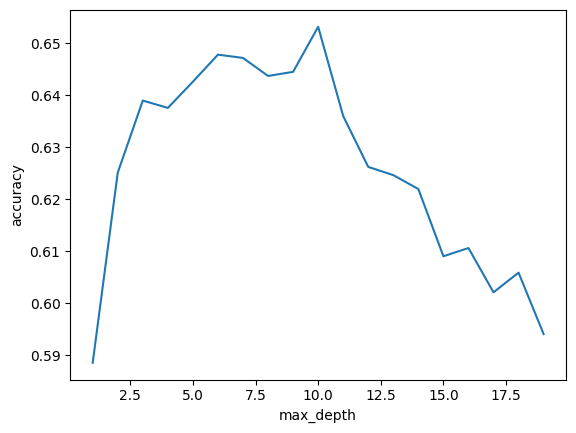

Time taken to train the model:  0.7286891937255859
Binary cross entropy: 12.841886848815228
Accuracy: 0.6437129524530205
Best Accuracy for Decision Tree (sklearn): 0.6437129524530205 with max_depth=10


In [16]:
def get_model(param):
    return tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 20), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_sk = test_model(best_model, train, test, classification=True)
print(f"Best Accuracy for Decision Tree (sklearn): {best_accuracy_DT_sk} with max_depth={best_param}")

### From scratch

In [21]:
clf = DecisionTreeClassifier( max_depth=8)
test_model(clf, train, test, classification=True)

Time taken to train the model:  3.411768913269043
Binary cross entropy: 12.846432649469676
Accuracy: 0.6435868331441543


0.6435868331441543

Trying hyperparameters: 1
Time taken to train the model:  0.59755539894104
Binary cross entropy: 16.05854713505361
Accuracy: 0.5544694939303169
Value: 0.5544694939303169
Trying hyperparameters: 2
Time taken to train the model:  0.9142732620239258
Binary cross entropy: 15.285736657216638
Accuracy: 0.5759104524672868
Value: 0.5759104524672868
Trying hyperparameters: 3
Time taken to train the model:  1.125523567199707
Binary cross entropy: 15.012980017980057
Accuracy: 0.583477849597982
Value: 0.583477849597982
Trying hyperparameters: 4
Time taken to train the model:  1.4390547275543213
Binary cross entropy: 14.75158823871167
Accuracy: 0.5907299385148983
Value: 0.5907299385148983
Trying hyperparameters: 5
Time taken to train the model:  1.7859680652618408
Binary cross entropy: 14.581115339188807
Accuracy: 0.5954595617215829
Value: 0.5954595617215829
Trying hyperparameters: 6
Time taken to train the model:  2.1863391399383545
Binary cross entropy: 14.399277579697754
Accuracy: 0.600504493142

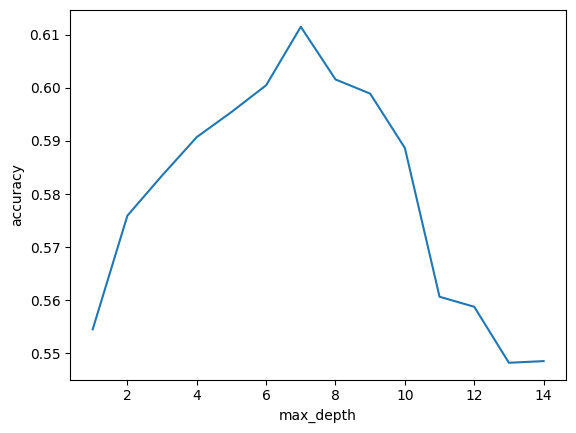

Time taken to train the model:  2.720187187194824
Binary cross entropy: 14.319272061510784
Accuracy: 0.6027241770715096
Best Accuracy for Decision Tree (scratch): 0.6437129524530205 with max_depth=7


In [17]:
def get_model(param):
    return DecisionTreeClassifier(max_depth=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 15), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'max_depth', 'accuracy')
best_model = get_model(param=best_param)
best_accuracy_DT_my = test_model(best_model, train, test, classification=True)
print(f"Best Accuracy for Decision Tree (scratch): {best_accuracy_DT_my} with max_depth={best_param}")


In [1]:
from utils import *

# Linear Regression

In [10]:
df, train, test, val = get_data(normalize=True, binary_label=False)

In [ ]:
from sklearn.linear_model import SGDRegressor

### Analytical Linear Regression From Scratch

In [15]:
class ScratchLinearRegressionAnalytical:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.weights)


test_model(ScratchLinearRegressionAnalytical(), train, test, classification=False)
# works really poorly with not normalized data
# Why worse than sklearn?

Time taken to train the model:  0.023252487182617188
Root Mean Squared Error: 8310.886013705811


8310.886013705811

### Scratch

In [17]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=False):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred>=0, 1, 0)

            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param
            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # works also with not normalized data
test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.04581499099731445
Root Mean Squared Error: 8273.862920013378


8273.862920013378

In [23]:
regressor = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False)
rmse_LR_NR_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  3.019599199295044
Root Mean Squared Error: 8275.739371762584


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
#No regularization
regressor = ScratchLinearRegression(regularization='', n_iters=1000,lr=0.2)
rmse_LR_NR_my = test_model(regressor, train, test, classification=False)

Time taken to train the model:  1.3438680171966553
Root Mean Squared Error: 8275.80546379286


Trying hyperparameters: 0.001
Time taken to train the model:  1.3562700748443604
Root Mean Squared Error: 7546.217657591242
Value: 7546.217657591242
Trying hyperparameters: 0.002
Time taken to train the model:  0.9650344848632812
Root Mean Squared Error: 7485.639353084593
Value: 7485.639353084593
Trying hyperparameters: 0.004
Time taken to train the model:  0.9170608520507812
Root Mean Squared Error: 7487.756139280329
Value: 7487.756139280329
Trying hyperparameters: 0.008
Time taken to train the model:  0.9341013431549072
Root Mean Squared Error: 7486.791903303474
Value: 7486.791903303474
Trying hyperparameters: 0.016
Time taken to train the model:  0.8498692512512207
Root Mean Squared Error: 7482.292673519695
Value: 7482.292673519695
Trying hyperparameters: 0.032
Time taken to train the model:  0.8841171264648438
Root Mean Squared Error: 7481.992739704844
Value: 7481.992739704844
Trying hyperparameters: 0.064
Time taken to train the model:  0.865546464920044
Root Mean Squared Error: 7

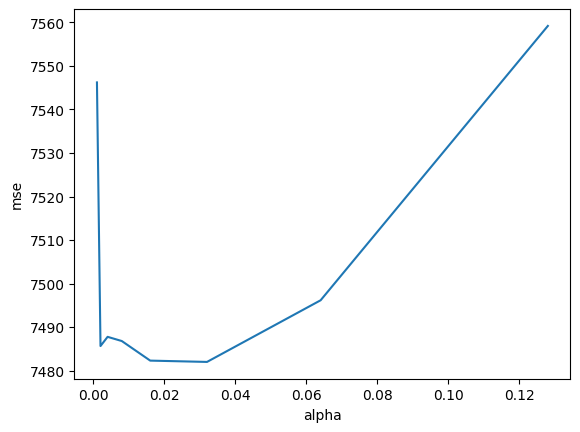

Time taken to train the model:  0.8053073883056641
Root Mean Squared Error: 8276.733410799
Best rmse for Linear Regression (scratch): 8276.733410799 with lr=0.032


In [52]:
 #TO DEL
def get_model(param):
    return  ScratchLinearRegression(regularization='', n_iters=1000,lr=param)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 0.2:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = get_model(best_param)

rmse_LR_NR_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression (scratch): {rmse_LR_NR_my} with lr={best_param}")


## L1 regularization

### Sklearn

In [37]:
regressor = SGDRegressor(max_iter=1000, penalty='l1', learning_rate='constant', shuffle=False, eta0=0.00001, alpha=100)
rmse_LR_L1_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  4.956868648529053
Root Mean Squared Error: 8251.875504985122


### Scratch

Trying hyperparameters: 0.1
Time taken to train the model:  2.140456199645996
Root Mean Squared Error: 7485.112666374343
Value: 7485.112666374343
Trying hyperparameters: 0.2
Time taken to train the model:  1.0882043838500977
Root Mean Squared Error: 7484.96648216334
Value: 7484.96648216334
Trying hyperparameters: 0.4
Time taken to train the model:  0.971642255783081
Root Mean Squared Error: 7484.705585117933
Value: 7484.705585117933
Trying hyperparameters: 0.8
Time taken to train the model:  0.9851326942443848
Root Mean Squared Error: 7484.280579452767
Value: 7484.280579452767
Trying hyperparameters: 1.6
Time taken to train the model:  0.9722976684570312
Root Mean Squared Error: 7483.790943200983
Value: 7483.790943200983
Trying hyperparameters: 3.2
Time taken to train the model:  0.9697942733764648
Root Mean Squared Error: 7483.222028489958
Value: 7483.222028489958
Trying hyperparameters: 6.4
Time taken to train the model:  1.206376552581787
Root Mean Squared Error: 7482.166399702954
V

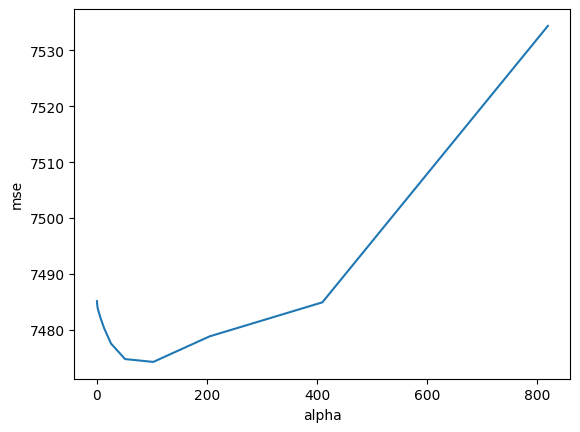

Time taken to train the model:  1.022836685180664
Root Mean Squared Error: 8251.90777476523
Best rmse for Linear Regression L1 (scratch): 8251.90777476523 with alpha=102.4


In [41]:
def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,lr=0.01)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100):
    #     yield alpha
    alpha = 0.1
    while alpha < 1000:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param)

rmse_LR_L1_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression L1 (scratch): {rmse_LR_L1_my} with alpha={best_param}")

##  L2 regularization

### Sklearn

In [47]:
regressor = SGDRegressor(max_iter=1000, penalty='l2', learning_rate='constant', shuffle=False, eta0=0.00001, alpha=0.5)
rmse_LR_L2_sk = test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.32388901710510254
Root Mean Squared Error: 8266.18668587692


### Scratch

Trying hyperparameters: 0.001
Time taken to train the model:  2.188009262084961
Root Mean Squared Error: 7484.88229219937
Value: 7484.88229219937
Trying hyperparameters: 0.002
Time taken to train the model:  1.1739675998687744
Root Mean Squared Error: 7484.502882453825
Value: 7484.502882453825
Trying hyperparameters: 0.004
Time taken to train the model:  0.9353456497192383
Root Mean Squared Error: 7483.7728705543095
Value: 7483.7728705543095
Trying hyperparameters: 0.008
Time taken to train the model:  0.9559571743011475
Root Mean Squared Error: 7482.4243387325205
Value: 7482.4243387325205
Trying hyperparameters: 0.016
Time taken to train the model:  0.8981657028198242
Root Mean Squared Error: 7480.145248096583
Value: 7480.145248096583
Trying hyperparameters: 0.032
Time taken to train the model:  0.8814253807067871
Root Mean Squared Error: 7477.061750689474
Value: 7477.061750689474
Trying hyperparameters: 0.064
Time taken to train the model:  0.876652717590332
Root Mean Squared Error: 

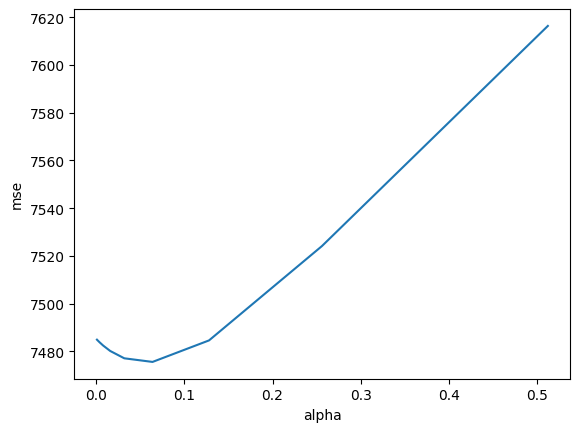

Time taken to train the model:  0.8603434562683105
Root Mean Squared Error: 8270.084734322667
Best rmse for Linear Regression L2 (scratch): 8251.90777476523 with alpha=0.064


In [48]:
#L2 regularization
def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,lr=0.01)

def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param)

rmse_LR_L2_my = test_model(regressor, train, test, classification=False)
print(f"Best rmse for Linear Regression L2 (scratch): {rmse_LR_L1_my} with alpha={best_param}")

## Elastic net regularization

### Sklearn

In [53]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.2)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  2.3339409828186035
Root Mean Squared Error: 8274.942072408272


In [54]:
model = SGDRegressor(max_iter=1000, penalty='elasticnet', learning_rate='constant', shuffle=False, eta0=0.00001,
                     early_stopping=False, alpha=0.5, l1_ratio=0.5)
rmse_LR_EL_sk = test_model(model, train, test, classification=False)

Time taken to train the model:  1.6507151126861572
Root Mean Squared Error: 8269.28193026024


### Scratch

Trying hyperparameters: 0.9990009990009991
Time taken to train the model:  2.0301804542541504
Mean Squared Error: 56006295.459590904
Root Mean Squared Error: 7483.735394813936
R-squared Score: 0.020662906978738738
Value: 56006295.459590904
Trying hyperparameters: 0.998003992015968
Time taken to train the model:  1.2977888584136963
Mean Squared Error: 56000627.83486049
Root Mean Squared Error: 7483.3567224114395
R-squared Score: 0.020762012179007194
Value: 56000627.83486049
Trying hyperparameters: 0.9960159362549801
Time taken to train the model:  1.377115249633789
Mean Squared Error: 55989746.36672418
Root Mean Squared Error: 7482.629642493619
R-squared Score: 0.02095228767009205
Value: 55989746.36672418
Trying hyperparameters: 0.9920634920634921
Time taken to train the model:  1.4177486896514893
Mean Squared Error: 55969809.10386689
Root Mean Squared Error: 7481.297287494121
R-squared Score: 0.021300914568001206
Value: 55969809.10386689
Trying hyperparameters: 0.984251968503937
Time t

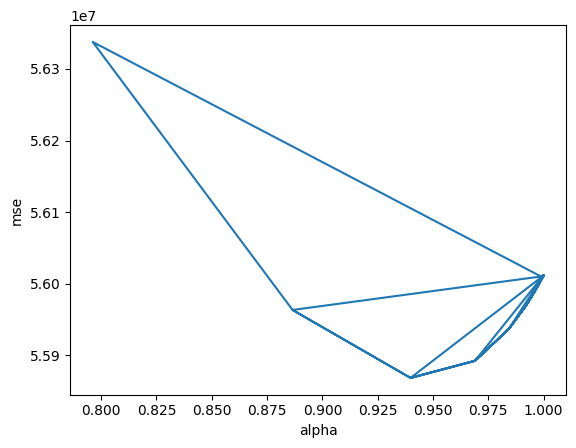

Time taken to train the model:  1.145259141921997
Mean Squared Error: 68387676.64274618
Root Mean Squared Error: 8269.684192443276
R-squared Score: 0.03134081491081331


68387676.64274618

In [13]:
def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1 / (l1 + l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  1.3808584213256836
Mean Squared Error: 55904913.86416126
Root Mean Squared Error: 7476.958864682971
R-squared Score: 0.022435685487639745
Value: 55904913.86416126
Trying hyperparameters: 0.92
Time taken to train the model:  1.1047961711883545
Mean Squared Error: 55887276.51624723
Root Mean Squared Error: 7475.779325010018
R-squared Score: 0.022744095620697014
Value: 55887276.51624723
Trying hyperparameters: 0.93
Time taken to train the model:  1.0943922996520996
Mean Squared Error: 55875007.554799184
Root Mean Squared Error: 7474.958699203574
R-squared Score: 0.022958633092606373
Value: 55875007.554799184
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  1.1066339015960693
Mean Squared Error: 55868637.835250504
Root Mean Squared Error: 7474.5326165085735
R-squared Score: 0.023070015260896137
Value: 55868637.835250504
Trying hyperparameters: 0.9500000000000001
Time taken to train the model:  1.27178716

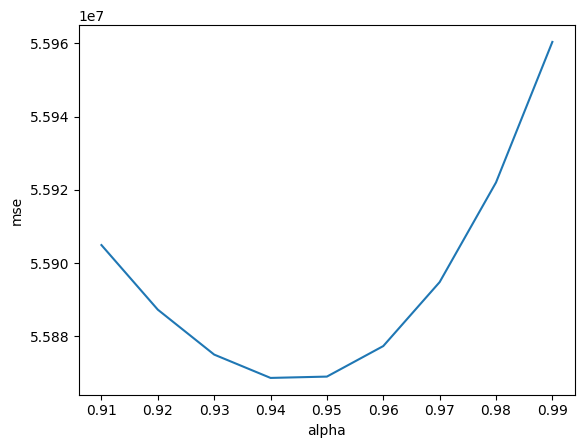

Time taken to train the model:  1.1934008598327637
Mean Squared Error: 68387703.38223955
Root Mean Squared Error: 8269.685809161045
R-squared Score: 0.031340436166321206


68387703.38223955

In [14]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1, 10):
        yield 0.9 + a / 100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  1.8538179397583008
Mean Squared Error: 56001486.63726316
Root Mean Squared Error: 7483.414103018966
R-squared Score: 0.020746994991357015
Value: 56001486.63726316
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.1796128749847412
Mean Squared Error: 56006714.014235385
Root Mean Squared Error: 7483.763359048399
R-squared Score: 0.020655588049939166
Value: 56006714.014235385
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  1.4242687225341797
Mean Squared Error: 56012081.66403663
Root Mean Squared Error: 7484.1219701469745
R-squared Score: 0.02056172827025593
Value: 56012081.66403663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  1.2425601482391357
Mean Squared Error: 56017591.62969057
Root Mean Squared Error: 7484.490071453804
R-squared Score: 0.020465379927593785
Value: 56017591.62969057
Trying hyperparameters: (0.01, 0.9)
Time taken to train the model:  1.1882

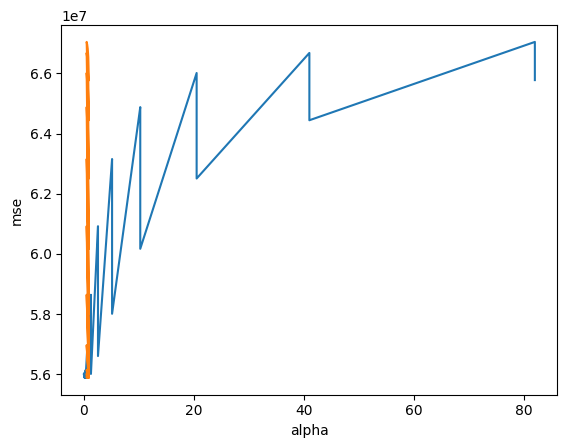

Time taken to train the model:  2.4938156604766846
Mean Squared Error: 68390149.31812192
Root Mean Squared Error: 8269.833693498433
R-squared Score: 0.031305791353470114


68390149.31812192

In [19]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5, 10):
            yield a, b / 10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)

rmse_LR_EL_my = test_model(regressor, train, test, classification=False)

In [1]:
from utils import *

# Linear Classification
The Class for linear and logistic classification is the same one as the one for linear regression

In [2]:
df, train, test, val = get_data(normalize=True, binary_label=True)

In [3]:
from sklearn.linear_model import SGDClassifier

In [4]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=True):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred >= 0, 1, 0)
            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [12]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.001,
                          early_stopping=False, loss='perceptron')
accuracy_LC_NR_sk = test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.017316579818725586
Binary cross entropy: 16.48307317302797
Accuracy: 0.5426913860512045


### Scratch

In [45]:
#No regularization
regressor = ScratchLinearRegression(regularization='', classification=True)
accuracy_LC_NR_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.3608081340789795
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563


## L1 Regularization

L1 Regularization does not benefit the model

Trying hyperparameters: 0
Time taken to train the model:  2.5634851455688477
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 1e-05
Time taken to train the model:  1.5271072387695312
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.0005
Time taken to train the model:  1.510301113128662
Binary cross entropy: 14.660669358966144
Accuracy: 0.59325240422513
Value: 0.59325240422513
Trying hyperparameters: 0.001
Time taken to train the model:  1.4634270668029785
Binary cross entropy: 14.677716648918432
Accuracy: 0.5927794419044616
Value: 0.5927794419044616
Trying hyperparameters: 0.01
Time taken to train the model:  1.3723118305206299
Binary cross entropy: 15.143675907614254
Accuracy: 0.5798518051395238
Value: 0.5798518051395238
Best hyperparameters: 0
Best value: 0.5949865994009144


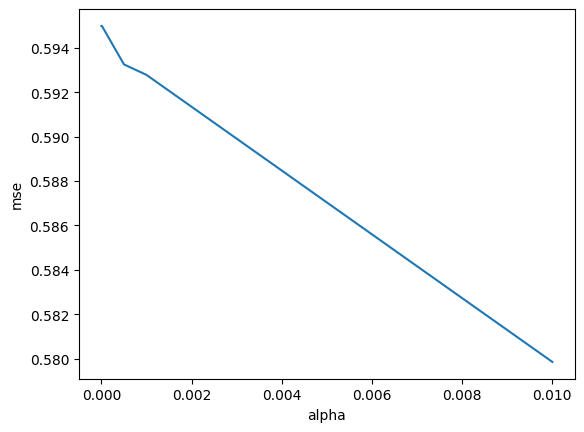

Time taken to train the model:  1.227055549621582
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563
Best rmse for Linear Classification L1 (scratch): 0.5816622524908563 with alpha=0


In [53]:
def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param, classification=True)

best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0005,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param, classification=True)

accuracy_LC_L1_my = test_model(regressor, train, test, classification=True)
print(f"Best rmse for Linear Classification L1 (scratch): {accuracy_LC_L1_my} with alpha={best_param}")


## L2

Trying hyperparameters: 0
Time taken to train the model:  1.935549259185791
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 1e-05
Time taken to train the model:  1.4412131309509277
Binary cross entropy: 14.592480199156999
Accuracy: 0.5951442535078039
Value: 0.5951442535078039
Trying hyperparameters: 0.0005
Time taken to train the model:  1.427668571472168
Binary cross entropy: 14.609527489109286
Accuracy: 0.5946712911871355
Value: 0.5946712911871355
Trying hyperparameters: 0.001
Time taken to train the model:  1.4226913452148438
Binary cross entropy: 14.609527489109286
Accuracy: 0.5946712911871355
Value: 0.5946712911871355
Trying hyperparameters: 0.01
Time taken to train the model:  1.2707774639129639
Binary cross entropy: 14.60384505912519
Accuracy: 0.5948289452940249
Value: 0.5948289452940249
Best hyperparameters: 1e-05
Best value: 0.5951442535078039


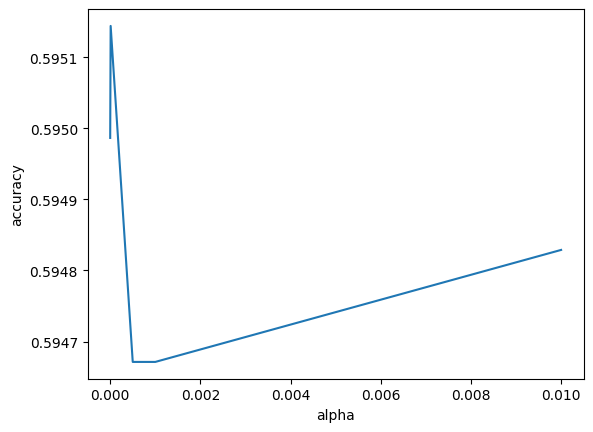

Time taken to train the model:  1.2300090789794922
Binary cross entropy: 15.073874970149133
Accuracy: 0.5817883717997225
Best accuracy for Linear Regression L2 (scratch): 0.5817883717997225 with alpha=1e-05


In [58]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param, classification=True,lr=0.1)


def iterate_hyperparameters():
    alpha = 0.00001
    while alpha < 1:
        yield alpha
        alpha *=10


best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0005,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param, classification=True)

accuracy_LC_L2_my = test_model(regressor, train, test, classification=True)
print(f"Best accuracy for Linear Regression L2 (scratch): {accuracy_LC_L2_my} with alpha={best_param}")

L1 and L2 regularization does not benefit the model therefore is useless to test elasticnet

# Logistic Classifier

## No Regularization

### Sklearn

In [87]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=1000, penalty=None)
accuracy_LO_NR_sk=test_model(regressor, train, test, classification=True)

/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Time taken to train the model:  1.597651720046997
Binary cross entropy: 12.673692224600657
Accuracy: 0.6483793668810695


In [99]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.0005,
                          early_stopping=False, loss='log_loss')
accuracy_LO_NR_sk=test_model(regressor, train, test, classification=True)


Time taken to train the model:  0.05865907669067383
Binary cross entropy: 12.637325819365074
Accuracy: 0.649388321351999


### Scratch

In [72]:
#No regularization
regressor = ScratchLinearRegression(regularization='', logistic=True, classification=True,lr=0.9)
accuracy_LO_NR_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.0831942558288574
Binary cross entropy: 12.610051015438387
Accuracy: 0.6501450372051961


Trying hyperparameters: 0.1
Time taken to train the model:  2.4571425914764404
Binary cross entropy: 12.319508205518838
Accuracy: 0.6582058962635977
Value: 0.6582058962635977
Trying hyperparameters: 0.2
Time taken to train the model:  1.9314911365509033
Binary cross entropy: 12.222906895789215
Accuracy: 0.660886016080719
Value: 0.660886016080719
Trying hyperparameters: 0.30000000000000004
Time taken to train the model:  1.684640645980835
Binary cross entropy: 12.188812315884642
Accuracy: 0.6618319407220558
Value: 0.6618319407220558
Trying hyperparameters: 0.4
Time taken to train the model:  1.722099781036377
Binary cross entropy: 12.131988016043687
Accuracy: 0.6634084817909507
Value: 0.6634084817909507
Trying hyperparameters: 0.5
Time taken to train the model:  1.5425403118133545
Binary cross entropy: 12.15471773598007
Accuracy: 0.6627778653633927
Value: 0.6627778653633927
Trying hyperparameters: 0.6
Time taken to train the model:  1.618786334991455
Binary cross entropy: 12.15471773598

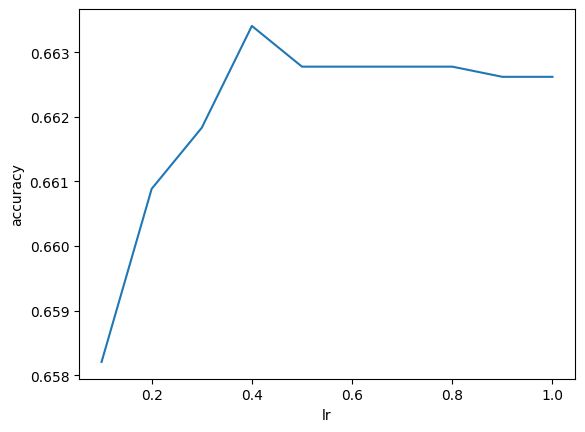

Time taken to train the model:  1.670142412185669
Binary cross entropy: 12.632780018710626
Accuracy: 0.6495144406608652
Best accuracy for Logistic Classification (scratch): 0.6495144406608652 with lr=0.4


In [74]:
def get_model(param):
    return  ScratchLinearRegression(regularization='', logistic=True, classification=True,lr=param)


def iterate_hyperparameters():
    alpha = 0.1
    while alpha < 1:
        yield alpha
        alpha += 0.1


best_lr, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(best_lr)

accuracy_LO_NR_my = test_model(best_model, train, test, classification=True)
print(f"Best accuracy for Logistic Classification (scratch): {accuracy_LO_NR_my} with lr={best_lr}")

## L1 Regularization

Trying hyperparameters: 0
Time taken to train the model:  1.9367907047271729
Binary cross entropy: 12.160400165964166
Accuracy: 0.6626202112565033
Value: 0.6626202112565033
Trying hyperparameters: 1e-05
Time taken to train the model:  1.686460256576538
Binary cross entropy: 12.160400165964166
Accuracy: 0.6626202112565033
Value: 0.6626202112565033
Trying hyperparameters: 0.0001
Time taken to train the model:  1.5976974964141846
Binary cross entropy: 12.188812315884642
Accuracy: 0.6618319407220558
Value: 0.6618319407220558
Trying hyperparameters: 0.001
Time taken to train the model:  1.7854092121124268
Binary cross entropy: 12.274048765646073
Accuracy: 0.6594671291187135
Value: 0.6594671291187135
Trying hyperparameters: 0.01
Time taken to train the model:  1.6837406158447266
Binary cross entropy: 12.393379795312077
Accuracy: 0.6561563928740344
Value: 0.6561563928740344
Best hyperparameters: 0
Best value: 0.6626202112565033


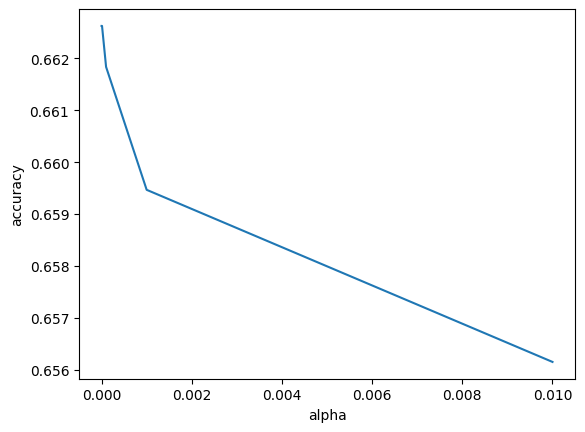

Time taken to train the model:  1.5569877624511719
Binary cross entropy: 12.610051015438387
Accuracy: 0.6501450372051961


0.6501450372051961

In [77]:
if not best_lr:
    best_lr = 0.9

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param, classification=True, logistic=True,lr=best_lr)

best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0001,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
best_model = get_model(best_param)

test_model(best_model, train, test, classification=True)

Trying hyperparameters: 0
Time taken to train the model:  2.1393587589263916
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 1e-05
Time taken to train the model:  1.596395492553711
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 0.0001
Time taken to train the model:  1.5196549892425537
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 0.001
Time taken to train the model:  1.575193166732788
Binary cross entropy: 12.666136434548655
Accuracy: 0.6485889957433392
Value: 0.6485889957433392
Trying hyperparameters: 0.01
Time taken to train the model:  1.683340311050415
Binary cross entropy: 12.643406714612276
Accuracy: 0.6492196121708971
Value: 0.6492196121708971
Trying hyperparameters: 0.1
Time taken to train the model:  1.6509389877319336
Binary cross entropy: 12.694548584469134
Ac

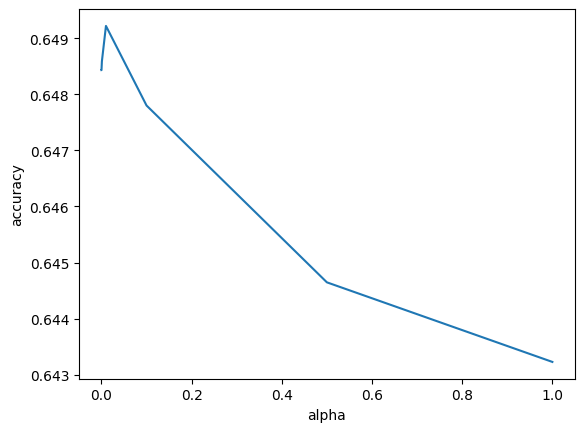

Time taken to train the model:  2.1155624389648438
Binary cross entropy: 12.800974642925198
Accuracy: 0.6448480262328162


0.6448480262328162

In [79]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param, classification=True, logistic=True)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0001,0.001,0.01,0.1,0.5), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
best_model = get_model(best_param)

accuracy_LO_L2_my=test_model(best_model, train, test, classification=True)
print(f"Best accuracy for Logistic Classification L2 (scratch): {accuracy_LO_L2_my} with lr={best_param}")

In [5]:
from utils import *

# KNN
Since hyperparameter optimization would be extremely slow with the non-optimized version of KNN the parameters will be chosen using the sklearn implementation and then tested on the one from scratch.
For the classification normalized data will be used, on the contrary for regression the data will not be normalized.

In [39]:
from scipy.spatial.distance import cdist


class ScratchKNeighbors:
    def __init__(self, classification, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
        self.classification = classification

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        distances = cdist(X_test, self.X_train) # euclidean distances
        nearest_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors] # indices of n nearest neighbors
        nearest_targets = self.y_train[nearest_indices]
        predictions = np.mean(nearest_targets, axis=1)
        if self.classification:  #Majority vote is useless if binary classification
            return predictions >= 0.5
        return predictions

## Classification

In [47]:
df, train, test, val = get_data(normalize=True, binary_label=True)  # Normalizing the data leads to a slightly better accuracy (58% vs 63% for sklearn, 59% vs 64% for scratch)

### Sklearn

In [49]:
from sklearn.neighbors import KNeighborsClassifier

regressor = KNeighborsClassifier(n_neighbors=5)

test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.0021734237670898438
Binary cross entropy: 13.182821897898819
Accuracy: 0.6342540042880564


0.6342540042880564

In [ ]:
def get_model(param):
    return KNeighborsClassifier(n_neighbors=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 100, 5), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'k', 'accuracy')
best_model = get_model(best_param)

accuracy_KNN_sk = test_model(best_model, train, test, classification=True)
print(f"Best accuracy for KNN (sklearn): {accuracy_KNN_sk} with k={best_param}")

### Scratch

In [48]:
regressor = ScratchKNeighbors(classification=True, n_neighbors=30)
accuracy_KNN_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  3.0994415283203125e-06
Binary cross entropy: 13.060085280228726
Accuracy: 0.6376592256274436


## Regression

In [59]:
df, train, test, val = get_data(normalize=False, binary_label=False) # Normalizing the data leads to slightly worse loss (8582 vs 8505)

### Sklearn

In [58]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)

test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.00323486328125
Root Mean Squared Error: 9325.832134734226


9325.832134734226

Trying hyperparameters: 1
Time taken to train the model:  0.002633810043334961
Root Mean Squared Error: 15225.924163065538
Value: 15225.924163065538
Trying hyperparameters: 6
Time taken to train the model:  0.0020923614501953125
Root Mean Squared Error: 8490.828485311627
Value: 8490.828485311627
Trying hyperparameters: 11
Time taken to train the model:  0.0021033287048339844
Root Mean Squared Error: 8055.688675956313
Value: 8055.688675956313
Trying hyperparameters: 16
Time taken to train the model:  0.001959562301635742
Root Mean Squared Error: 7846.124723319356
Value: 7846.124723319356
Trying hyperparameters: 21
Time taken to train the model:  0.0012431144714355469
Root Mean Squared Error: 7810.077348671558
Value: 7810.077348671558
Trying hyperparameters: 26
Time taken to train the model:  0.0013880729675292969
Root Mean Squared Error: 7724.9434767499315
Value: 7724.9434767499315
Trying hyperparameters: 31
Time taken to train the model:  0.001195669174194336
Root Mean Squared Error: 7

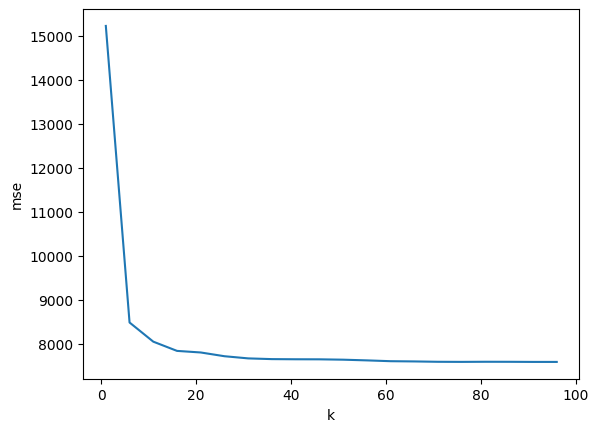

Time taken to train the model:  0.0013594627380371094
Root Mean Squared Error: 9314.63167163207
Best rmse for KNN (sklearn): 9314.63167163207 with k=96


In [18]:
def get_model(param):
    return KNeighborsRegressor(n_neighbors=param)


best_param, params, accuracies = optimize_hyperparameters(get_model, range(1, 100, 5), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'k', 'mse')
best_model = get_model(best_param)

rmse_KNN_sk = test_model(regressor, train, test, classification=False)
print(f"Best rmse for KNN (sklearn): {rmse_KNN_sk} with k={best_param}")


After k ~ 30 there is a clear diminishing return on loss reduction, therefore this k will be used

In [56]:
regressor = ScratchKNeighbors(classification=False, n_neighbors=30)
rmse_KNN_my = test_model(regressor, train, test, classification=False)

Time taken to train the model:  5.0067901611328125e-06
Root Mean Squared Error: 8582.839747518954


In [1]:
from utils import *

# Neural Network

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


class ScratchNeuralNetwork:

    def __init__(self, input_dim, hidden_dim, learning_rate=0.01, classification=False, epochs=10):
        self.W1 = np.random.rand(input_dim, hidden_dim)
        self.W2 = np.random.rand(hidden_dim, 1)
        self.b1 = np.zeros((1, hidden_dim))
        self.b2 = np.zeros((1, 1))
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_dim = hidden_dim
        self.classification = classification
        self.activation = sigmoid if classification else relu
        self.activation_derivative = sigmoid_derivative if classification else relu_derivative
        self.hidden_output = None

    def forward(self, X):
        self.hidden_output = self.activation(np.dot(X, self.W1) + self.b1)
        output = np.dot(self.hidden_output, self.W2) + self.b2
        return self.activation(output)

    def backward(self, X, y, output):
        error = (output - y)
        error /= X.shape[0]  # divide by batch size
        if not self.classification:  # For classification the activation derivative is simplified with the log_loss
            error = error * self.activation_derivative(output)
        d_weights2 = np.dot(self.hidden_output.T, error)
        d_bias2 = np.sum(error, axis=0, keepdims=True)

        d_hidden_output = np.dot(error, self.W2.T) * self.activation_derivative(self.hidden_output)
        d_weights1 = np.dot(X.T, d_hidden_output)
        d_bias1 = np.sum(d_hidden_output, axis=0, keepdims=True)

        lr = self.learning_rate

        self.W2 -= lr * d_weights2
        self.b2 -= lr * d_bias2
        self.W1 -= lr * d_weights1
        self.b1 -= lr * d_bias1

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        for i in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(output - y))
            print("Epoch ", i, " loss: ", loss)

    def predict(self, X):
        y_pred = self.forward(X)
        if self.classification:
            return np.where(y_pred > 0.5, 1, 0)
        else:
            return y_pred

## Regression

In [3]:
df, train, test, val = get_data(normalize=True, binary_label=False)

### sklearn

In [4]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    # solver='sgd',
    alpha=0.0000,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    shuffle=True,
    random_state=1,
    verbose=True,
    # momentum=0.3
    max_iter=100,
)
rmse_NN_sk = test_model(regressor, train, test, classification=False)

Iteration 1, loss = 93498697.77038790
Iteration 2, loss = 93432062.40464759
Iteration 3, loss = 93293548.64018172
Iteration 4, loss = 93069953.35270239
Iteration 5, loss = 92760638.93848751
Iteration 6, loss = 92382787.90908296
Iteration 7, loss = 91956352.08388145
Iteration 8, loss = 91499833.44672398
Iteration 9, loss = 91026719.75822501
Iteration 10, loss = 90560136.70846792
Iteration 11, loss = 90113265.94776164
Iteration 12, loss = 89693504.91610427
Iteration 13, loss = 89308666.07409894
Iteration 14, loss = 88956998.48968241
Iteration 15, loss = 88642001.42838758
Iteration 16, loss = 88357171.21842405
Iteration 17, loss = 88105014.00186810
Iteration 18, loss = 87878828.59345932
Iteration 19, loss = 87678595.18919952
Iteration 20, loss = 87503312.44308227
Iteration 21, loss = 87349442.94160980
Iteration 22, loss = 87210534.23690429
Iteration 23, loss = 87088145.65057297
Iteration 24, loss = 86977647.78264335
Iteration 25, loss = 86881830.21974926
Iteration 26, loss = 86793663.0772

/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### scratch

In [5]:
df, train, test, val = get_data(normalize=True, binary_label=False)
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=100, learning_rate=0.00001, epochs=100,
                                    classification=False)
rmse_NN_my = test_model(my_regressor, train, test, classification=False)

Epoch  0  loss:  186243269.33690143
Epoch  1  loss:  186098971.6551389
Epoch  2  loss:  185953268.77152896
Epoch  3  loss:  185805562.18485543
Epoch  4  loss:  185655276.40027347
Epoch  5  loss:  185501903.7962325
Epoch  6  loss:  185345014.663702
Epoch  7  loss:  185184228.3953833
Epoch  8  loss:  185019193.37229562
Epoch  9  loss:  184849648.7311762
Epoch  10  loss:  184675408.003681
Epoch  11  loss:  184496362.45869714
Epoch  12  loss:  184312475.37868577
Epoch  13  loss:  184123754.16902584
Epoch  14  loss:  183930300.89547917
Epoch  15  loss:  183732305.46564612
Epoch  16  loss:  183529959.26958907
Epoch  17  loss:  183323709.1415077
Epoch  18  loss:  183113970.56385392
Epoch  19  loss:  182901188.40310147
Epoch  20  loss:  182685964.25758746
Epoch  21  loss:  182468891.09314483
Epoch  22  loss:  182250663.6319432
Epoch  23  loss:  182031999.17468348
Epoch  24  loss:  181813643.35858518
Epoch  25  loss:  181596302.9346728
Epoch  26  loss:  181380789.07297626
Epoch  27  loss:  1811

8427.343324827922

Given that the optimization is quite expensive hidden_dim and lr will be optimized separately

In [ ]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=param, learning_rate=0.00001, epochs=100,
                                classification=False)


best_h, params, accuracies = optimize_hyperparameters(get_model, range(100, 1000, 200), train, test, val,
                                                      classification=False)
plot_2d(params, accuracies, 'hidden_dim', 'accuracy')
best_model = get_model(param=best_h)

In [ ]:
if not best_h:
    best_h = 300


def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=best_h, learning_rate=param * 10 ** -4, epochs=100,
                                classification=False)


best_param, params, accuracies = optimize_hyperparameters(get_model, (0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5), train, test,
                                                          val,
                                                          classification=False)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(param=best_param)

rmse_NN_my = test_model(best_model, train, test, classification=False)

## Classification

In [6]:
df, train, test, val = get_data(normalize=True, binary_label=True)

### sklearn

In [10]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic',
    learning_rate_init=0.001,
    max_iter=100,
)
accuracy_NN_sk = test_model(classifier, train, test, classification=True)

Time taken to train the model:  18.518577575683594
Binary cross entropy: 12.423673188606026
Predicted mean: 0.5521503342161685 Actual mean: 0.5353764661369655
Accuracy: 0.6553159288687098


/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6553159288687098

### scratch

In [67]:
my_regressor = ScratchNeuralNetwork(input_dim=58, hidden_dim=250, learning_rate=0.1, epochs=200, classification=True)
accuracy_NN_my = test_model(my_regressor, train, test, classification=True)

Epoch  0  loss:  0.45056166141658377
Epoch  1  loss:  0.44984796947303635
Epoch  2  loss:  0.4490844013451975
Epoch  3  loss:  0.4482651134548795
Epoch  4  loss:  0.4473833036835954
Epoch  5  loss:  0.4464310065469873
Epoch  6  loss:  0.4453988357995212
Epoch  7  loss:  0.44427565953025044
Epoch  8  loss:  0.44304818773300764
Epoch  9  loss:  0.44170044459285174
Epoch  10  loss:  0.4402130850742823
Epoch  11  loss:  0.4385624933487692
Epoch  12  loss:  0.43671956043196697
Epoch  13  loss:  0.4346479636023581
Epoch  14  loss:  0.4323016305266573
Epoch  15  loss:  0.42962081302463123
Epoch  16  loss:  0.42652572778429476
Epoch  17  loss:  0.42290589860215877
Epoch  18  loss:  0.4186019787309408
Epoch  19  loss:  0.4133750818117468
Epoch  20  loss:  0.40685884047239707
Epoch  21  loss:  0.39849973210262707
Epoch  22  loss:  0.38751185379717884
Epoch  23  loss:  0.37284637650780855
Epoch  24  loss:  0.35329612570660246
Epoch  25  loss:  0.3288191199312176
Epoch  26  loss:  0.30429191056181

0.6282002774624795

Given that the optimization is quite expensive hidden_dim and lr will be optimized separately

Trying hyperparameters: 100
Epoch  0  loss:  0.43946315923178947
Epoch  1  loss:  0.4368242706479235
Epoch  2  loss:  0.433836907623429
Epoch  3  loss:  0.43042468156088964
Epoch  4  loss:  0.4264818134397438
Epoch  5  loss:  0.42185645998021576
Epoch  6  loss:  0.41632436169298914
Epoch  7  loss:  0.4095497562054382
Epoch  8  loss:  0.40103199667415446
Epoch  9  loss:  0.3900339597047615
Epoch  10  loss:  0.37546256256708954
Epoch  11  loss:  0.355573544362571
Epoch  12  loss:  0.3270970804037427
Epoch  13  loss:  0.28612584913135986
Epoch  14  loss:  0.26621837721958225
Epoch  15  loss:  0.2644431828312395
Epoch  16  loss:  0.2631765000145676
Epoch  17  loss:  0.2618267777471076
Epoch  18  loss:  0.26059449524062256
Epoch  19  loss:  0.25938135607967766
Epoch  20  loss:  0.2582268162794511
Epoch  21  loss:  0.2571113790550144
Epoch  22  loss:  0.25604187500985676
Epoch  23  loss:  0.2550133679135551
Epoch  24  loss:  0.25402619070824006
Epoch  25  loss:  0.2530782501310043
Epoch  26 

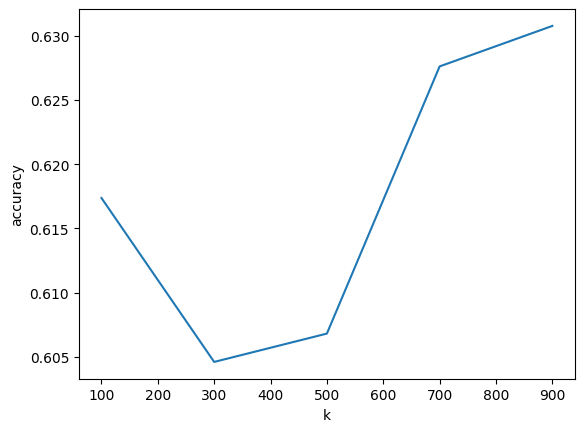

Epoch  0  loss:  0.4578349568922151
Epoch  1  loss:  0.4573587672264122
Epoch  2  loss:  0.45680949279062794
Epoch  3  loss:  0.4561543399016594
Epoch  4  loss:  0.4553444991464062
Epoch  5  loss:  0.45430615762317206
Epoch  6  loss:  0.452924695915888
Epoch  7  loss:  0.4510137613977978
Epoch  8  loss:  0.4482436301294876
Epoch  9  loss:  0.4439393544303865
Epoch  10  loss:  0.4364281441474834
Epoch  11  loss:  0.42024459616868454
Epoch  12  loss:  0.3668301404013627
Epoch  13  loss:  0.4598775711539172
Epoch  14  loss:  0.3963310173571891
Epoch  15  loss:  0.31181031365304807
Epoch  16  loss:  0.5028399964849875
Epoch  17  loss:  0.39214944372268684
Epoch  18  loss:  0.3056492316545478
Epoch  19  loss:  0.49360591253298486
Epoch  20  loss:  0.3955884282979783
Epoch  21  loss:  0.3071789443086307
Epoch  22  loss:  0.49972946887168423
Epoch  23  loss:  0.3926733365034801
Epoch  24  loss:  0.30210452086617096
Epoch  25  loss:  0.4918735800599203
Epoch  26  loss:  0.39522421393402635
Epo

0.48265859503089925

In [17]:
def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=param, learning_rate=0.2, epochs=100, classification=True)


best_h, params, accuracies = optimize_hyperparameters(get_model, range(100, 1000, 200), train, test, val,
                                                      classification=True)
plot_2d(params, accuracies, 'hidden_dim', 'accuracy')
best_model = get_model(param=best_h)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

Trying hyperparameters: 0.01
Epoch  0  loss:  0.4350601872707736
Epoch  1  loss:  0.43491163145829836
Epoch  2  loss:  0.43476218644601194
Epoch  3  loss:  0.43461184382575163
Epoch  4  loss:  0.4344605950686487
Epoch  5  loss:  0.43430843152291393
Epoch  6  loss:  0.43415534441157405
Epoch  7  loss:  0.43400132483016096
Epoch  8  loss:  0.43384636374435087
Epoch  9  loss:  0.433690451987552
Epoch  10  loss:  0.43353358025844185
Epoch  11  loss:  0.43337573911845007
Epoch  12  loss:  0.43321691898918746
Epoch  13  loss:  0.4330571101498197
Epoch  14  loss:  0.43289630273438434
Epoch  15  loss:  0.43273448672904974
Epoch  16  loss:  0.4325716519693142
Epoch  17  loss:  0.43240778813714564
Epoch  18  loss:  0.4322428847580584
Epoch  19  loss:  0.4320769311981271
Epoch  20  loss:  0.43190991666093587
Epoch  21  loss:  0.4317418301844616
Epoch  22  loss:  0.43157266063788924
Epoch  23  loss:  0.43140239671835884
Epoch  24  loss:  0.43123102694764154
Epoch  25  loss:  0.4310585396687437
Epo

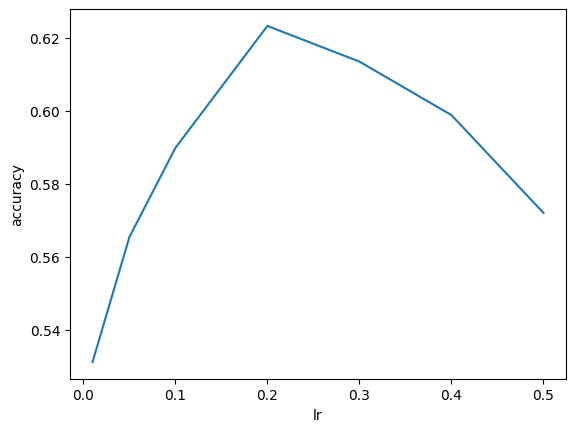

Epoch  0  loss:  0.438479717743933
Epoch  1  loss:  0.4357829749204466
Epoch  2  loss:  0.43274380115171496
Epoch  3  loss:  0.42928931013118427
Epoch  4  loss:  0.42532249775120146
Epoch  5  loss:  0.4207112650432621
Epoch  6  loss:  0.41527099556047853
Epoch  7  loss:  0.4087362581031845
Epoch  8  loss:  0.40071418016337146
Epoch  9  loss:  0.3906082550903353
Epoch  10  loss:  0.3774989854471186
Epoch  11  loss:  0.3599642643013764
Epoch  12  loss:  0.3357419789291866
Epoch  13  loss:  0.30051915571551824
Epoch  14  loss:  0.262298752128422
Epoch  15  loss:  0.25982734319083073
Epoch  16  loss:  0.2584879883329887
Epoch  17  loss:  0.25770543080169006
Epoch  18  loss:  0.2568511550947088
Epoch  19  loss:  0.2560836921861584
Epoch  20  loss:  0.2553124462602891
Epoch  21  loss:  0.2545720878233603
Epoch  22  loss:  0.25384626409767963
Epoch  23  loss:  0.2531414494903068
Epoch  24  loss:  0.252454239752651
Epoch  25  loss:  0.2517855941610434
Epoch  26  loss:  0.2511345425848607
Epoch

0.6177323748265859

In [18]:
if not best_h:
    best_h = 300


def get_model(param):
    return ScratchNeuralNetwork(input_dim=58, hidden_dim=best_h, learning_rate=param, epochs=100, classification=True)


best_param, params, accuracies = optimize_hyperparameters(get_model, (0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5), train, test,
                                                          val,
                                                          classification=True)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(param=best_param)

accuracy_NN_my = test_model(best_model, train, test, classification=True)

#TEST

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)
regressor = MLPRegressor(
    hidden_layer_sizes=(400, 300, 200, 20),
    activation='logistic',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    power_t=0.4,
    max_iter=500,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.8,
    beta_2=0.9,
    epsilon=1e-08,
    n_iter_no_change=20,
    max_fun=15000
)
test_model(regressor, train_x, train_y, test_x, test_y)
